In [15]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
import scipy
from scipy.io import loadmat
from sklearn.svm import SVC

In [16]:
mat = loadmat('ex3data1.mat')
X = mat["X"]
y = mat["y"]

In [17]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

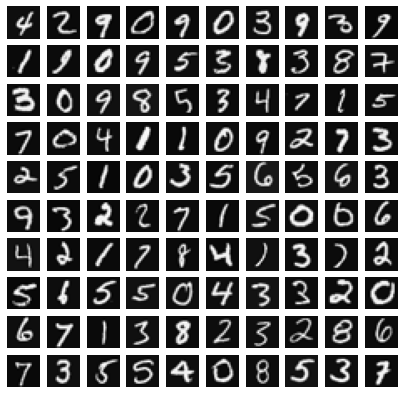

In [18]:
fig, axis = plt.subplots(10, 10, figsize = (7,7))
for i in range(10):
    for j in range(10):
        axis[i, j].imshow(X[np.random.randint(0,5001),:].reshape(20, 20,order="F"), cmap = 'gray') #each time loop runs a random value is chosen and printed the loop runs 10 x 10 times hence 100 outputs
        axis[i, j].axis("off")

In [24]:
def costFunction(X, y, theta, L):
    hypothesis = sigmoid(np.dot(X, theta))
    m = len(y)

    J = np.sum((y)*np.log(hypothesis) + (1-y)*np.log(1 - hypothesis))
    J = -1/m * J + L/(2*m) * np.sum(theta[1:]**2)

    j0  = 1/m * np.dot(X.T, (hypothesis - y))[0]
    j1  = 1/m * np.dot(X.T, (hypothesis - y))[1:] + (L/m) * theta[1:] #dot product of all elemnts from 1-> end beacuse acc to algo m = 1 -> m similarly (theta j) starts from 1 -> n 
    ogr = np.vstack((j0[:np.newaxis], j1))

    return J, ogr

In [25]:
def gradientDescent(X, y, theta, alpha, iters, L):
    m = len(y)
    J_h = []
    for i in range(iters):
        J, ogr = costFunction(X, y, theta, L)
        theta = theta - (alpha * ogr)
        J_h.append(J)
        
    return theta, J_h

In [29]:
def OneVsAll(X, y, terms, L):
    
    m, n = X.shape[0], X.shape[1]
    theta = np.zeros((n+1,1))
    theta_l = []
    J_l = []
    X = np.hstack((np.ones((m,1)), X))

    for i in range (1, terms+1):
        theta_m, J = gradientDescent(X, np.where(y==i, 1, 0), theta, 1, 300, L)
        theta_l.extend(theta_m)
        J_l.extend(J)
    
    return np.array(theta_l).reshape(terms,n+1), J_l


In [30]:
all_theta, all_J = OneVsAll(X, y, 10, 0.1)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

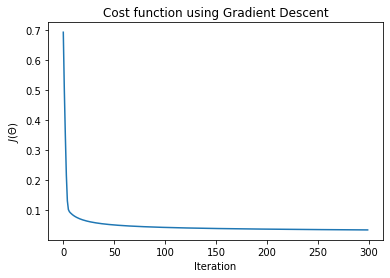

In [34]:
plt.plot(all_J[0:300])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")